# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows that the data rather reflects a Poisson distribution with an expected rate of occurences $\lambda = 1$. The onesided skewness and the long tail lead to a mean and the standard deviation that do not provide a good representation or characterisation of the data.

Text(0.5, 0, 'Charges')

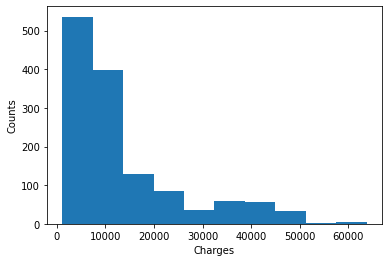

In [5]:
plt.figure()
plt.hist(medical['charges'])
plt.ylabel('Counts')
plt.xlabel('Charges')

In [6]:
print('Mean: ',np.mean(medical['charges']))
print('Std: ',np.std(medical['charges']))

Mean:  13270.422265141257
Std:  12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I would identify the margin of error of the sample and the p-value for the mean being below 12.000 \\$. If the margin of error lies above 1270 \\$, then the null hypothesis (average charge below 12,000) is part of my uncertainty and I cannot say whether it is true or not. I would therefore calculate the 95\% confidence interval as $1.96 \cdot \sqrt{mean(charges)}$ with the square root of the mean being the first guess for the standard deviation of the Poisson distribution. To determine the p-value, I would sample the dataset with replacement until I obtain a normal distribution of its mean on which I can determine the one-sided p-value and another approximation of the standard deviation.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ It is a one-sided interval, since we look at any value below 12.000 \\$. Based on the results below, the square root of the mean of the standard deviation of the Poisson distribution results in a narrower confidence interval as the confidence interval based on the resampled sets. Still, the null hypothesis lies well outside the 95\% confidence interval with its lower limit at 12612 \\$ and a z-value of 3.79.

In [7]:
1.96*np.sqrt(np.mean(medical['charges']))

225.78674490272152

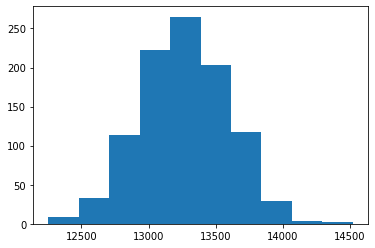

In [26]:
def meanofsample(data,n_times,replace=True):
    n = len(data)
    mean = []
    for i in range(n_times):
        mean.append(np.mean(data.sample(n,replace=replace)))
    return mean;
mean = meanofsample(medical['charges'],1000)
_ = plt.hist(mean,bins=10)
                

In [13]:
std = np.std(mean)
z_val = (np.mean(mean)-12000)/std

In [24]:
print('Mean of normal distribution: ',np.mean(mean))
print('Z-Value of normal distribution: ', z_val)
print('95% confidence interval: ','{:.2f} +/- {:.2f}'.format(np.mean(mean),1.96*np.std(mean)))
print('95% confidence interval: ','[{:.2f}, {:.2f}]'.format(np.mean(mean)-1.96*np.std(mean),np.mean(mean)+1.96*np.std(mean)))

Mean of normal distribution:  13268.13905198896
Z-Value of normal distribution:  3.788620177349135
95% confidence interval:  13268.14 +/- 656.06
95% confidence interval:  [12612.08, 13924.20]


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that all people are charged the same, or that the mean charge for people with health insurance is approximately the same as the mean charge for people without health insurance. The alternative hypothesis is that there is a discrepancy between the two, with positive t-values meaning people with health insurance ($x_1$) pay less than those without ($x_0$) and negative t-values for people with health insurance paying more. 
There are a couple of assumptions that need to be made: 

1. The overall sample is representative of the population.

2. The sampling size ($n_0$ + $n_1$) is large enough.

3. The subsamples are large enough (health insurance no/yes, $n_0$/$n_1$) and representative for the sub-populations ($\bar{x_0}$, $\bar{x_1}$).

4. The discrepancy in charges is not due to other discrepancies such as treatment given or income which can be correlated to both, the charges/treatment and the posession of a health insurance. 




__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

### <font color=red>WRONG</font>

In [33]:
charges_nh = medical['charges'][medical['insuranceclaim']==0] # no health insurance
charges_hi = medical['charges'][medical['insuranceclaim']==1] # health insurance
n_nh = len(charges_nh) 
n_hi = len(charges_hi)
print('Number of data no health insurance: ',n_nh)
print('Number of data with health insurance: ',n_hi)

# Sample the data sets
nh_mean = meanofsample(charges_nh,1000)
hi_mean = meanofsample(charges_hi,1000)

# calculate the standard deviation and t-statistic
sp = np.sqrt(((n_nh-1)*np.std(nh_mean)**2+(n_hi-1)*np.std(hi_mean)**2)/(n_nh+n_hi-2))
t = (np.mean(nh_mean)-np.mean(hi_mean))/(sp * np.sqrt((1/(n_nh-1))+(1/(n_hi-1))))
print('sp: ',sp, 't: ',t)

555 783


In [58]:
# With scipy
from scipy.stats import ttest_ind
t_val, p_score = ttest_ind(nh_mean,hi_mean)
print('t_val: ',t_val, 'p score: ',p_score)

t_val:  -419.65324007996145 p score:  0.0


### <font color=green> RIGHT </font>

In [59]:
# By hand
sp = np.sqrt(((n_nh-1)*np.std(charges_nh)**2+(n_hi-1)*np.std(charges_hi)**2)/(n_nh+n_hi-2))
t = (np.mean(charges_nh)-np.mean(charges_hi))/(sp * np.sqrt((1/(n_nh-1))+(1/(n_hi-1))))
print('sp: ',sp, 't: ',t)

sp:  11512.282899205744 t:  -11.891875945848732


In [62]:
# With scipy
from scipy.stats import ttest_ind
t_val, p_score = ttest_ind(charges_nh,charges_hi)
print('t_val: ',t_val, 'p score: ',p_score)

t_val:  -11.893299030876712 p score:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The t-test gives an indication of how far one is away from the null hypothesis (either given as a sample, ttest_ind, or as a certain mean, ttest_1samp). The z-score gives the distance from the mean in units of the standard deviation assuming a normal distribution. While there is no z-test function in scipy.stats, there is the zscore function which determines for each data point given, the z-scare based on the data mean and standard deviation. It therefore is only a measure of likelihood and not directly a measure to test a hypothesis. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test